In [57]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv('CompleteDataset.csv')


In [58]:
%matplotlib inline

In [59]:
df.Wage = df.Wage.apply(lambda x: float(x[1:-1]) * 1000 if x[1:-1] else 0.0)
df.Value = df.Value.apply(lambda x: float(x[1:-1]) * 1000000 if x[1:-1] else 0.0)
df.Age = df.Age.apply(lambda x: int(x))
# df['Ball control'] = df['Ball control'].apply(lambda x: int(x))
# df['Jumping'].apply(lambda x: int(x))

# Гистограмма распределения возраста игроков

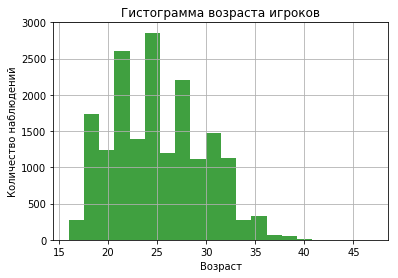

In [10]:
num_bins = 20
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df['Age'], num_bins, facecolor='green', alpha=0.75)
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество наблюдений')
ax.set_title('Гистограмма возраста игроков')
# ax.axis([40, 160, 0, 0.03])
ax.grid(True)

# Диаграмма рассеяния 
Показывает связь между двумя переменными. Зависимость зарплаты от возраста игрока

Text(0, 0.5, 'Зарплата')

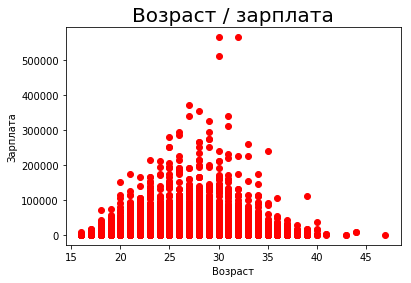

In [11]:
plt.scatter(df['Age'], df['Wage'], color='red')
plt.title('Возраст / зарплата', fontdict={'fontsize': 20})
plt.xlabel('Возраст')
plt.ylabel('Зарплата')

# Показывает связь между двумя переменными. Зависимость стоимости от возраста игрока

Text(0, 0.5, 'Стоимость')

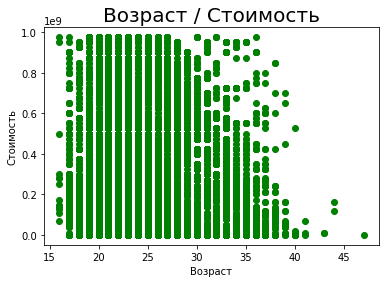

In [15]:
plt.scatter(df['Age'], df['Value'], color='green')
plt.title('Возраст / Стоимость', fontdict={'fontsize': 20})
plt.xlabel('Возраст')
plt.ylabel('Стоимость')

In [32]:
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# Страны по количеству игроков

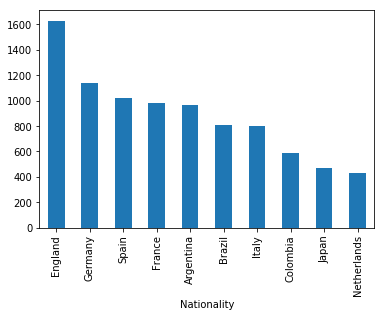

In [42]:
players = df[["Name", "Age", "Club", "Nationality"]].dropna()
data = players.groupby("Nationality").Name.count()
data.sort_values(ascending=False).head(10).plot(kind="bar")

# Страны по количеству игроков на интерактивной карте

In [65]:
# Страны по количеству игроков на карте мира

data = df['Nationality'].replace("US", "United States")
data = df['Nationality'].replace("England", "United Kingdom")
data = data.value_counts()

iplot([go.Choropleth(
    locationmode='country names',
    locations=data.index.values,
    text=data.index,
    z=data.values
)])